🟣 PROBLEM STATEMENT: You are working as a data scientist in the sales department and the sales team provided you with data from 1115 stores. The objective is to predict the daily sales in the future based on the follwing features:


*   ✅ Id: transactionID (combination of Store and Date)

*   ✅ Store: unique storeId

*   ✅ Sales: sales per day
*   ✅ Customer: Number of customers on the given day


*   ✅ Open: Boolean to say whether the store is open or closed (0 = closed, 1 = open)


*   ✅ Promo: Describes if the store is running promo on that day or not


*   ✅ StateHoliday: Indicates which state holiday ( a = publicholiday, b = Easterholiday, c = Christmas, 0 = None) 

*   ✅ SchoolHoliday: Indicates if the (Store, Date) was affected by the closure of public schools

*   ✅ StoreType: categorical variable to indicate type of store (a, b, c, d)

*   ✅ Assortment: a = basic, b = estra, C = extended 
*   ✅ CompetitionDistance(meters): distance to closest competitor store


*   ✅ CompetitionOpenSince[Month/Year]: date when competition was open



*   ✅ Promo2: Promo2 is a continuing and consecutive promotion for some stores ( 0 = store is not participating, 1 = store is participating)
*   ✅ Promo2Since[Year/Week]: date when store started participating in Promo2


*   ✅ PromoInterval: describes the consecutive intervals Promo2 is started, naming the months promotion is started new. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, November of any given year for that store








🔵 Importing necessary librarires.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

🟠 Loading sales datasets.

In [ ]:
sales_df = pd.read_csv('/content/train.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


🟢 From the above table we can see that:

🟣 Average sales amount per day  = 5773 euros, minimum sales per day = 0, maximum sales per day = 41551

🟣 Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

🟠 Loading store datasets

In [ ]:
stores_df = pd.read_csv('/content/store.csv')

In [ ]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
stores_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


🟡 Data Exploration

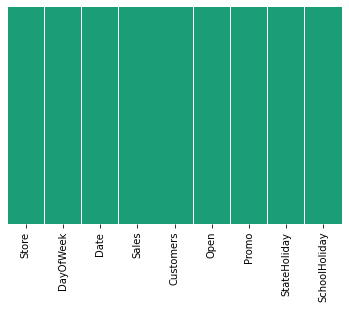

In [ ]:
# Exploring sales data
# Checking for missing values

sns.heatmap(sales_df.isnull(), yticklabels = False, cbar = False, cmap = 'Dark2')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f639bae3280>,
      dtype=object)

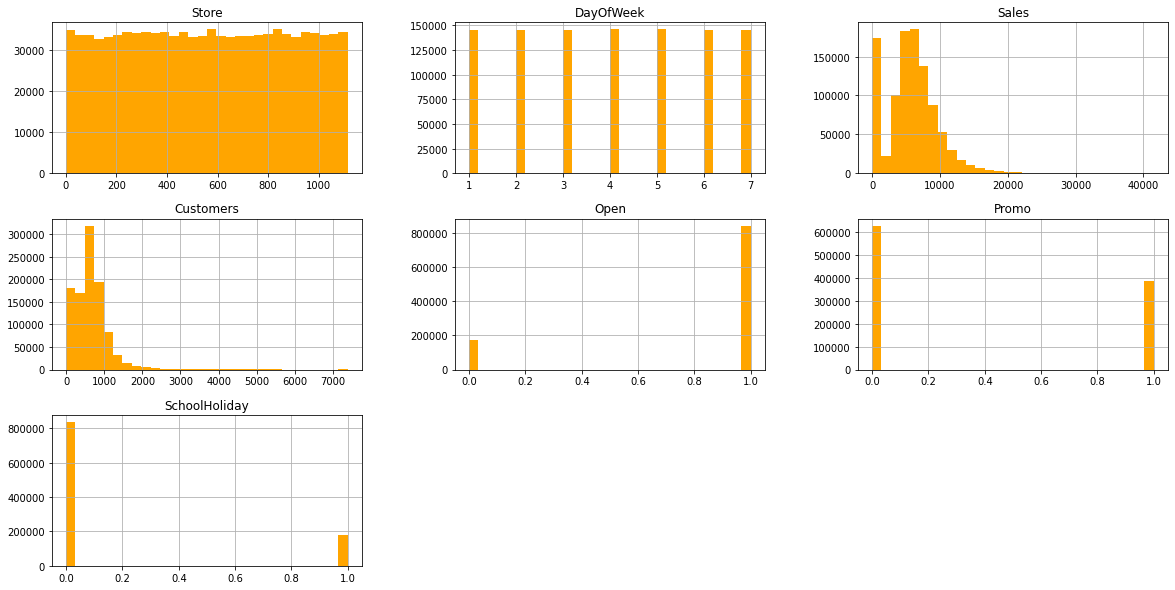

In [ ]:
# Plotting histogram of the sales data

sales_df.hist(bins = 30, figsize = (20,10), color = 'Orange')

In [ ]:
sales_df['Customers'].max()

7388

In [ ]:
# Checking for number of stores are closed and opened

closed_stores = sales_df[sales_df['Open'] == 0]
opened_stores = sales_df[sales_df['Open'] == 1]

In [ ]:
print('Total sales:', len(sales_df))
print('Number of stores closed: ', len(closed_stores))
print('Number of stores opened: ', len(opened_stores))

Total sales: 1017209
Number of stores closed:  172817
Number of stores opened:  844392


In [ ]:
# Removing closed stored

sales_df = sales_df[sales_df['Open'] == 1]

In [ ]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [ ]:
# Dropping open colums as it is just 1 throughout

sales_df.drop(['Open'], axis = 1, inplace = True)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


In [ ]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


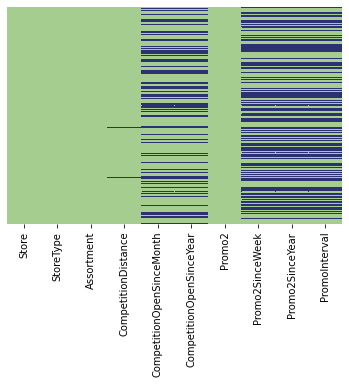

In [ ]:
# Exploring stores data

sns.heatmap(stores_df.isnull(), yticklabels = False, cbar = False, cmap = 'crest' )

In [ ]:
# Missing information in CompetitionDistance

stores_df[stores_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
# Missing information in CompetitionOpenSinceMonth

stores_df[stores_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# Missing information in Promo2SinceWeek

stores_df[stores_df['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# We can see that Promo2SinceWeek, Promo2SinceYear, PromoInterval is zero whenever Promo2 is zero

stores_df[stores_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
store_col = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

In [ ]:
for str in store_col:
  stores_df[str].fillna(0, inplace = True)

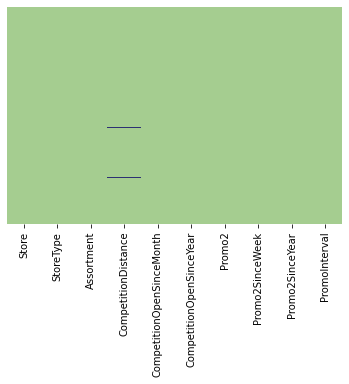

In [ ]:
# Check for missing data

sns.heatmap(stores_df.isnull(), yticklabels = False, cbar = False, cmap = 'crest')

In [ ]:
# Replacing the missing values with average value in CompetitionDistance

stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].mean(), inplace = True)

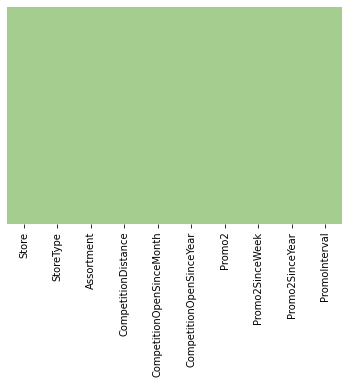

In [ ]:
# Check for missing data

sns.heatmap(stores_df.isnull(), yticklabels = False, cbar = False, cmap = 'crest')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6398f538b0>,
      dtype=object)

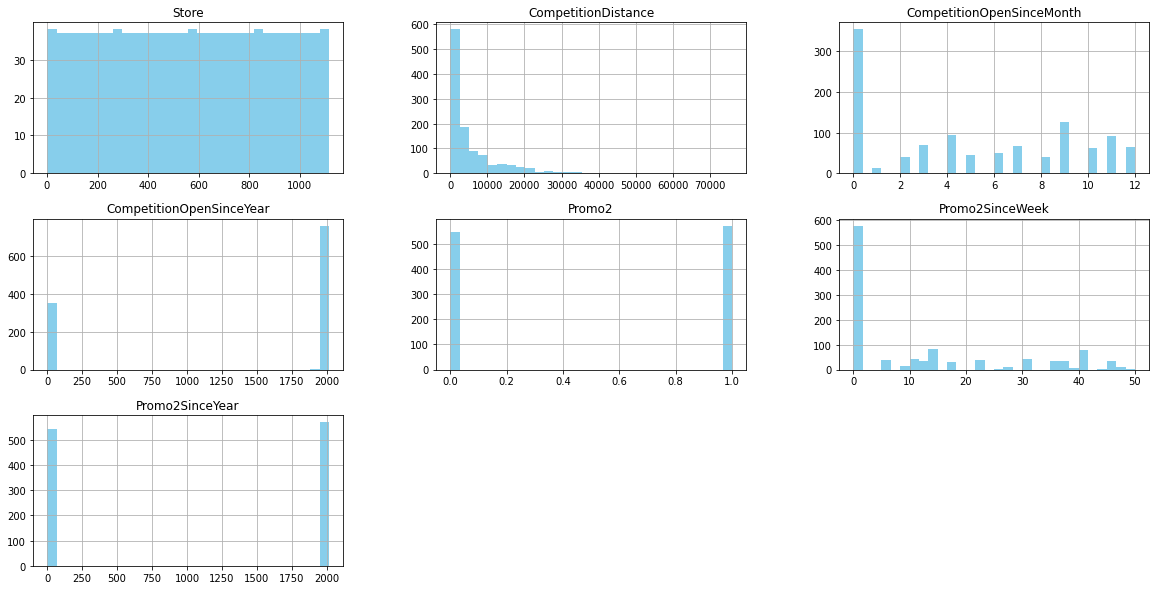

In [ ]:
# Plotting histogram for stores data
stores_df.hist(bins = 30, figsize = (20, 10), color = 'skyblue')

🔵 Merging the Sales_df and Stores_df

In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  object
 7   SchoolHoliday  844392 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


In [ ]:
merged_data = pd.merge(sales_df, stores_df, how = 'inner', on = 'Store')

In [ ]:
merged_data

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


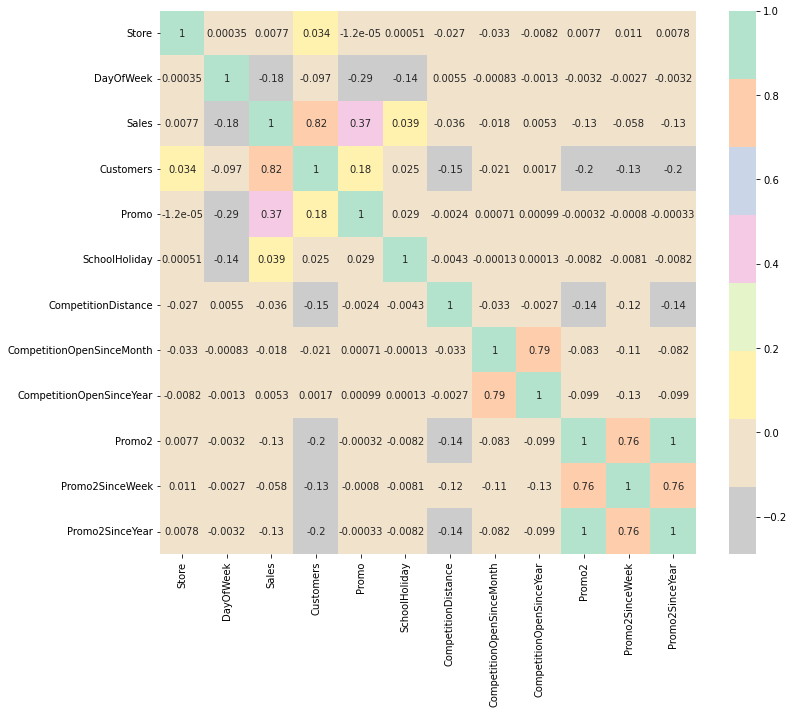

In [ ]:
# Checking for correlation using Pearson Correlation

plt.figure(figsize=(12,10))
corr = merged_data.corr()
sns.heatmap(corr, annot=True, cmap= 'Pastel2_r')
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(merged_data, 0.7)
len(set(corr_features))

4

In [ ]:
corr_features

{'CompetitionOpenSinceYear', 'Customers', 'Promo2SinceWeek', 'Promo2SinceYear'}

In [ ]:
# Separating the year and putting it in another column

merged_data['Year'] = pd.DatetimeIndex(merged_data['Date']).year

In [ ]:
merged_data

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013


In [ ]:
# Separating the month, day and putting it in another column

merged_data['Month'] = pd.DatetimeIndex(merged_data['Date']).month
merged_data['Day'] = pd.DatetimeIndex(merged_data['Date']).day

In [ ]:
merged_data

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


🟢 Data Visualization

Text(0.5, 1.0, 'Average customers per month')

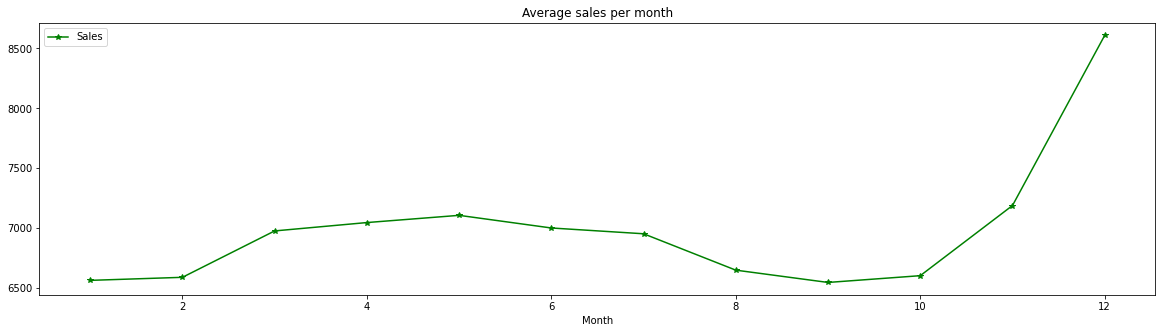

<Figure size 432x288 with 0 Axes>

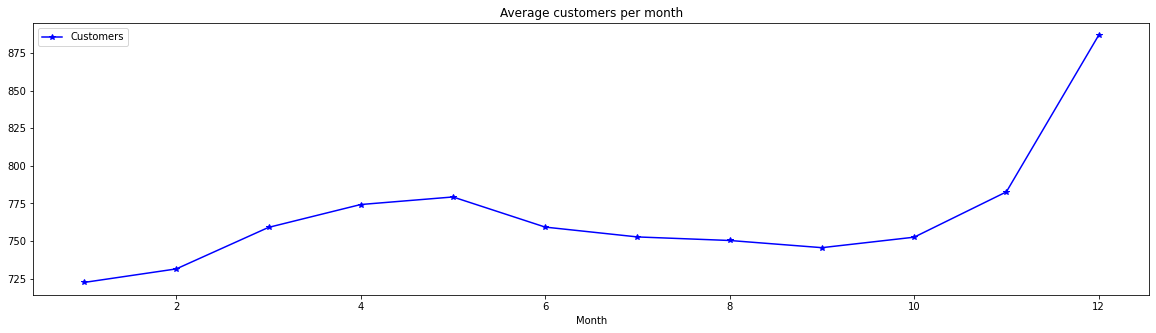

In [ ]:
# Plotting for sales and customers per month

axis = merged_data.groupby('Month')[['Sales']].mean().plot(figsize = (20, 5), marker = '*', color = 'g')
axis.set_title('Average sales per month')

plt.figure()

axis = merged_data.groupby('Month')[['Customers']].mean().plot(figsize = (20, 5), marker = '*', color = 'b')
axis.set_title('Average customers per month')

Text(0.5, 1.0, 'Average customers per day')

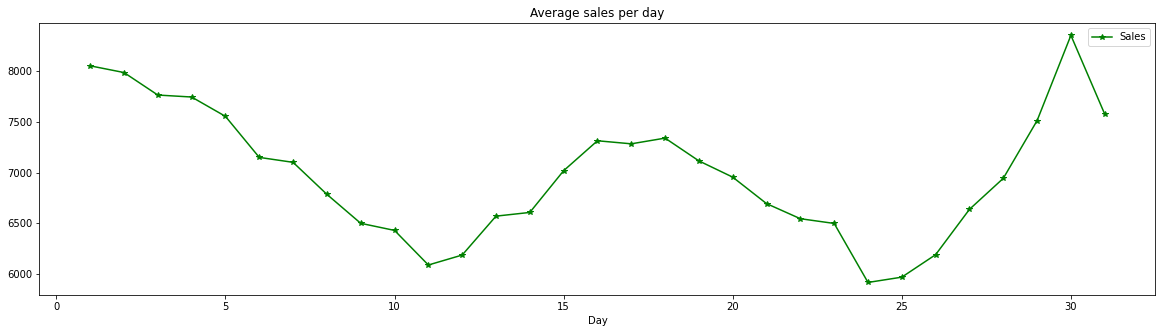

<Figure size 432x288 with 0 Axes>

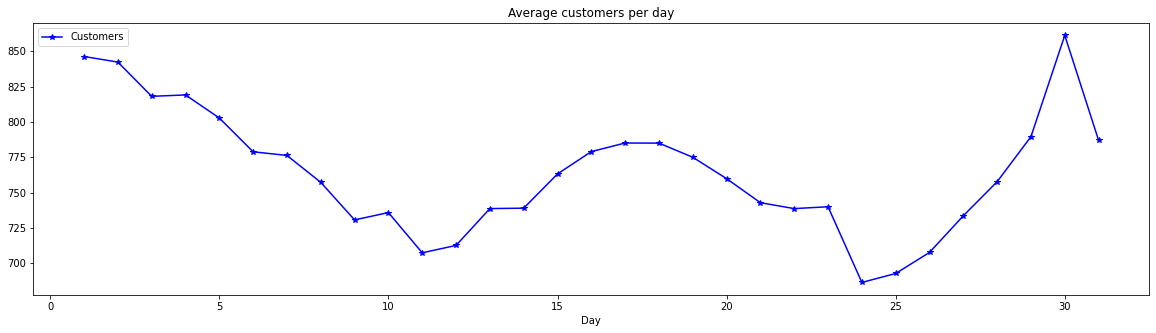

In [ ]:
# Plotting sales and customers per day

axis = merged_data.groupby('Day')[['Sales']].mean().plot(figsize = (20, 5), marker = '*', color = 'g')
axis.set_title('Average sales per day')

plt.figure()

axis = merged_data.groupby('Day')[['Customers']].mean().plot(figsize = (20, 5), marker = '*', color = 'b')
axis.set_title('Average customers per day')

Text(0.5, 1.0, 'Average customers per day of the week')

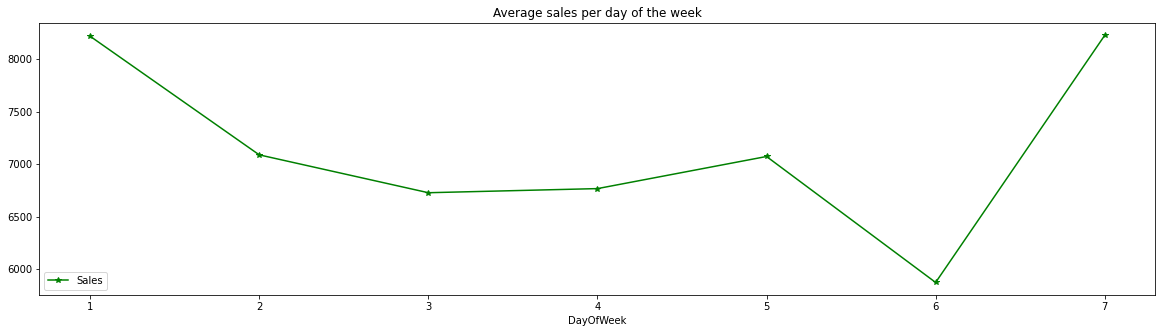

<Figure size 432x288 with 0 Axes>

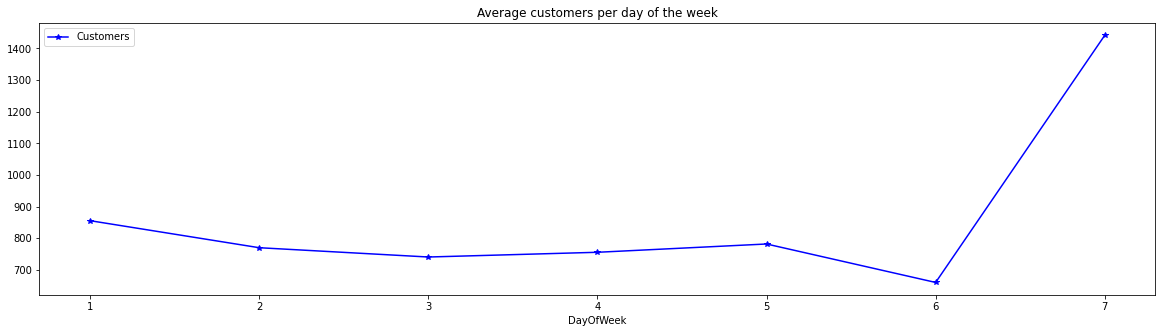

In [ ]:
# Plotting sales and customers per week

axis = merged_data.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (20, 5), marker = '*', color = 'g')
axis.set_title('Average sales per day of the week')

plt.figure()

axis = merged_data.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (20, 5), marker = '*', color = 'b')
axis.set_title('Average customers per day of the week')

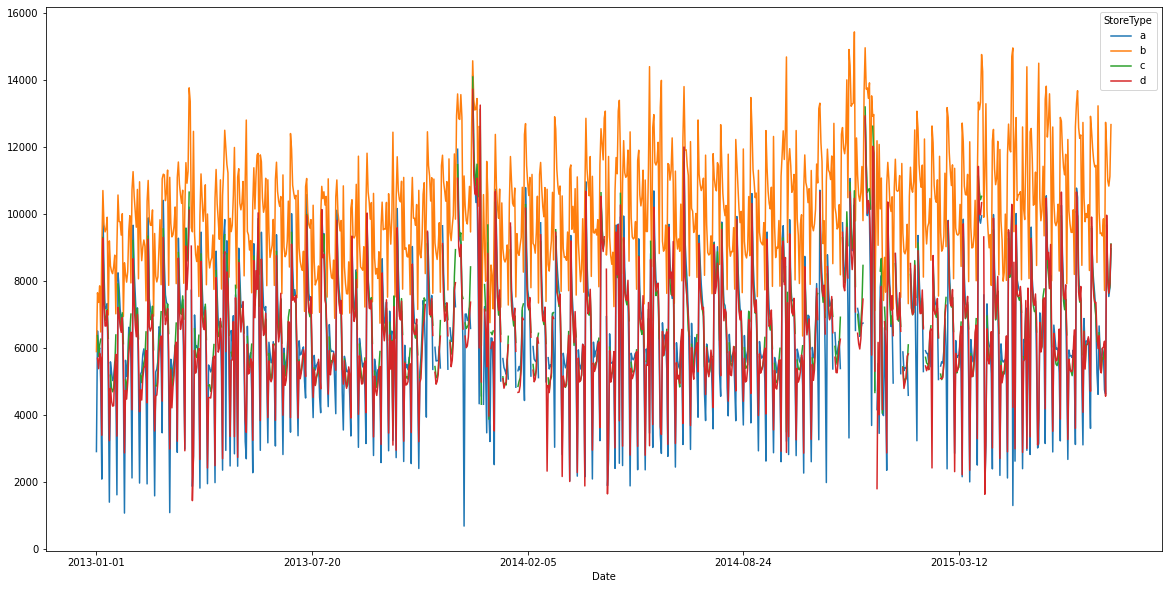

In [ ]:
# Lets see which store has highest sales and earning


fig, ax = plt.subplots(figsize = (20, 10))

merged_data.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

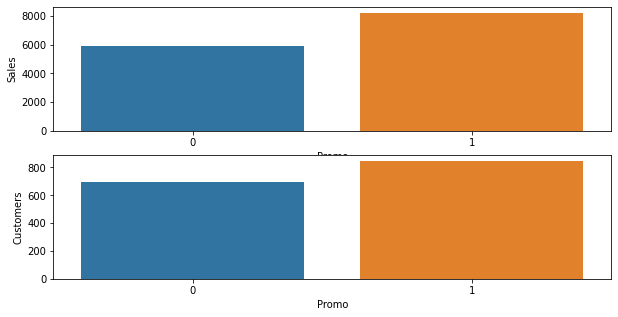

In [ ]:
# Lets see impact of promo on sales and customers

plt.figure(figsize = (10, 5))

plt.subplot(211) # 2 = 2 rows, 1 = 1 colums and 1 = 1st plot
sns.barplot(x = 'Promo', y = 'Sales', data = merged_data )

plt.subplot(212) # 2 = 2 rows, 1 = 1 colums and 1 = 2nd plot
sns.barplot(x = 'Promo', y = 'Customers', data = merged_data )


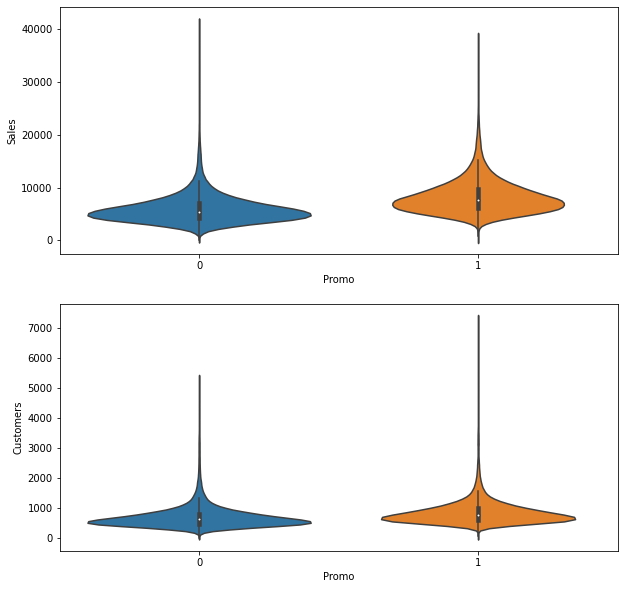

In [ ]:
plt.figure(figsize = (10, 10))

plt.subplot(211) # 2 = 2 rows, 1 = 1 colums and 1 = 1st plot
sns.violinplot(x = 'Promo', y = 'Sales', data = merged_data )

plt.subplot(212) # 2 = 2 rows, 1 = 1 colums and 1 = 2nd plot
sns.violinplot(x = 'Promo', y = 'Customers', data = merged_data )

🟡 Training the model part A

In [ ]:
# Installing fbprophet

!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
# Installing fbprophet

from prophet import Prophet

In [ ]:
def sales_prediction(Store_ID, sales_df, periods):

  sales_df = sales_df[sales_df['Store'] == Store_ID]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date' : 'ds', 'Sales' : 'y'})
  sales_df = sales_df.sort_values('ds')

  model =  Prophet()
  model.fit(sales_df)
  future  = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)

  figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
  figure_2 = model.plot_components(forecast)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnl3qm9ut/bsxl_oyw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnl3qm9ut/2b255q9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30384', 'data', 'file=/tmp/tmpnl3qm9ut/bsxl_oyw.json', 'init=/tmp/tmpnl3qm9ut/2b255q9f.json', 'output', 'file=/tmp/tmpnl3qm9ut/prophet_modelwlulr3qq/prophet_model-20230131172534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:25:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:25:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


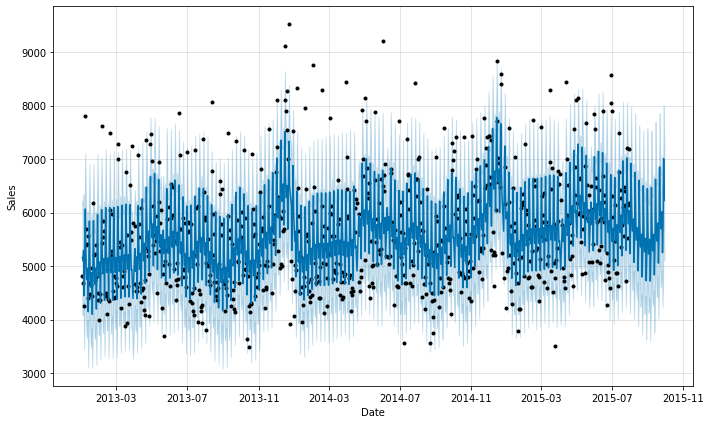

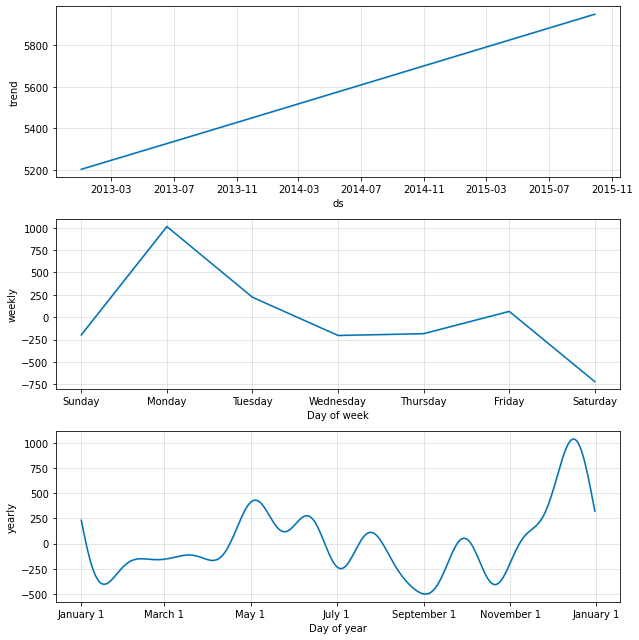

In [ ]:
sales_prediction(10, merged_data, 60)

🟡 Training the model part B

In [ ]:
def sales_prediction(Store_ID, sales_df, holidays, periods):
  # Function that takes in the storeID and returns two date/sales columns in Prophet format
  # Format data to fit prophet 

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  
  model    = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure_2  = model.plot_components(forecast)

In [ ]:
# Dates containg school holidays

school_holiday = merged_data[merged_data['SchoolHoliday'] == 1].loc[:, 'Date'].values

In [ ]:
school_holiday.shape

(163457,)

In [ ]:
# Dates containg school holidays

state_holiday = merged_data[(merged_data['StateHoliday'] == 'a') | (merged_data['StateHoliday'] == 'b') | (merged_data['StateHoliday'] == 'c') ].loc[:, 'Date'].values

In [ ]:
state_holiday.shape

(910,)

In [ ]:
state_holiday = pd.DataFrame({'ds': pd.to_datetime(state_holiday),
                              'holiday' : 'state_holiday'})

In [ ]:
state_holiday

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [ ]:
school_holiday = pd.DataFrame({'ds': pd.to_datetime(school_holiday),
                              'holiday' : 'school_holiday'})

In [ ]:
school_holiday

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [ ]:
# Concatinate school_holiday and state_holiday

school_state_holiday = pd.concat((state_holiday, school_holiday))

In [ ]:
school_state_holiday

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnl3qm9ut/tdihmtbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnl3qm9ut/du6ql8tq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17547', 'data', 'file=/tmp/tmpnl3qm9ut/tdihmtbf.json', 'init=/tmp/tmpnl3qm9ut/du6ql8tq.json', 'output', 'file=/tmp/tmpnl3qm9ut/prophet_modelqfb81ezr/prophet_model-20230131180159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:01:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:01:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


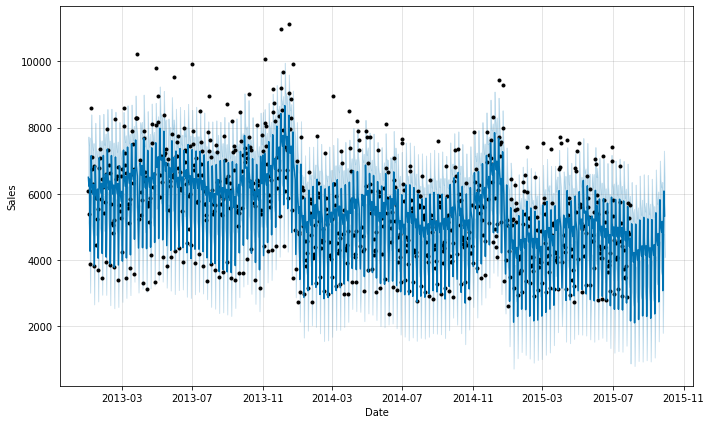

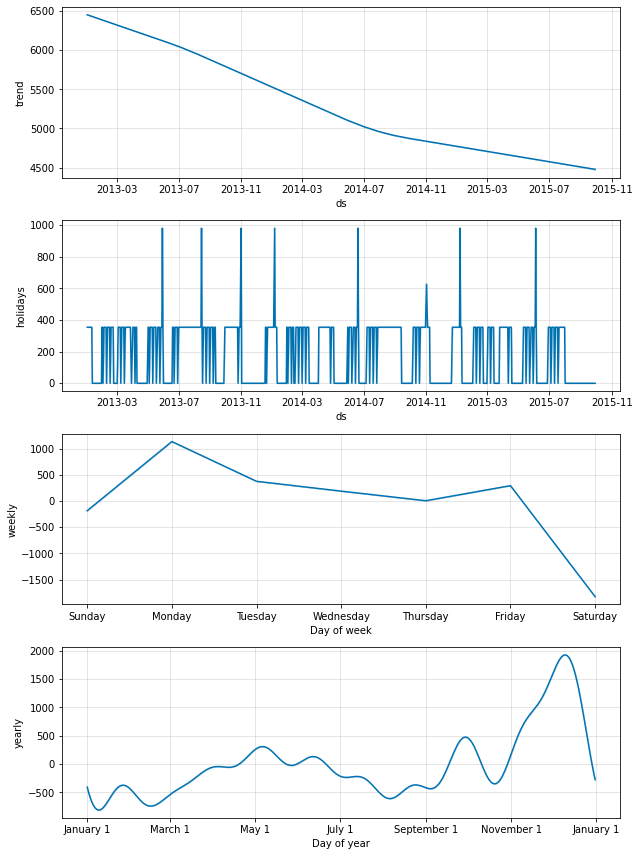

In [ ]:
# Let's make predictions using holidays for a specific store
sales_prediction (6, merged_data, school_state_holiday, 60)